## Project Overview

We made some predictions about how much bike rental traffic there will be in different areas of Chicago.

While there typically isn't too much traffic at individual stations, the influx and outflux of bikes to different service regions can have important logistic and business implications. Monitoring or, even better, predicting the movement of bikes around the city is useful!

This notebook mirrors the README but includes the associated code.

### Data Source

The Chicago Divvy bike share [data](https://divvy-tripdata.s3.amazonaws.com/index.html)
- 13 columns, 3.5 million rows (1 year)

## Exploratory Data Analysis
Let's take a look at a single station first. The busiest station in Chicago in the past year was on Streeter Dr & Grand Ave.

In [1]:
# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from model_funcs import *

In [2]:
sdga = station_data('Streeter Dr & Grand Ave', eda=True)

As a simple visualization, let's look at how much traffic there was on the last three days of our data set. Below are March 29-31st, a Monday to Wednesday, where you can see traffic peaked in the afternoon but was much lower on Wednesday.

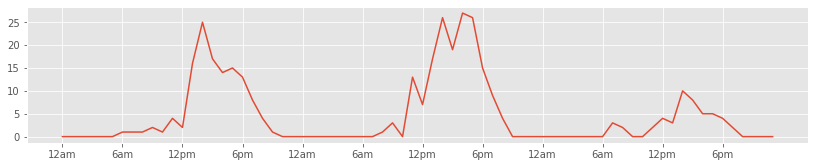

In [24]:
fig, ax = plt.subplots(figsize=(14,2.5))

ax.plot(np.arange(72), sdga['target'].iloc[-72:])
ax.set_xticks([0,6,12,18,24,30,36,42,48,54,60,66])
ax.set_xticklabels(['12am','6am','12pm','6pm','12am','6am','12pm','6pm','12am','6am','12pm','6pm']);

Next we'll look at how all of the downtown stations looked, Streeter and Grand included.

In [2]:
dt_s = station_data('downtown', start_end='start', exclude_within_region=True)
dt_e = station_data('downtown', start_end='end', exclude_within_region=True)

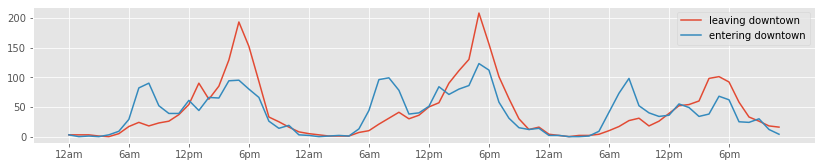

In [5]:
fig, ax = plt.subplots(figsize=(14,2.5))

ax.plot(np.arange(72), dt_s['target'].iloc[-72:], label='leaving downtown')
ax.plot(np.arange(72), dt_e['target'].iloc[-72:], label='entering downtown')
ax.set_xticks([0,6,12,18,24,30,36,42,48,54,60,66])
ax.set_xticklabels(['12am','6am','12pm','6pm','12am','6am','12pm','6pm','12am','6am','12pm','6pm'])
ax.legend();

In [ ]:
# get total entering / leaving downtown
# only one year, explain the pandemic had a noticeable effect, but not too bad. link to first EDA

## production

In [ ]:
# try to predict different time periods with model (wtf)

In [8]:
keras_obj = tf.keras.models.load_model('models/chinatown_end')
ct_data = station_data('chinatown', start_end='end')
model = Model(df=ct_data, model=keras_obj)

In [9]:
model.model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_4 (GRU)                  (None, 100)               30900     
_________________________________________________________________
dropout_4 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 101       
Total params: 31,001
Trainable params: 31,001
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.X_test[0]

array([[ 2.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 3.],
       [ 6.],
       [10.],
       [ 6.],
       [ 9.],
       [12.],
       [25.],
       [26.],
       [12.],
       [33.],
       [18.],
       [43.],
       [46.],
       [40.],
       [25.],
       [13.],
       [ 4.],
       [ 3.],
       [ 5.],
       [ 0.],
       [ 4.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 2.],
       [ 6.],
       [ 7.],
       [13.],
       [10.],
       [10.],
       [15.],
       [11.],
       [ 7.],
       [ 9.],
       [ 8.],
       [11.],
       [ 8.],
       [ 8.],
       [ 4.],
       [ 1.],
       [ 3.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 0.],
       [10.],
       [ 9.],
       [ 9.],
       [11.],
       [12.],
       [ 6.],
       [12.],
       [11.],
       [11.],
       [20.],
       [22.],
       [29.],
       [16.],
       [10.],
       [ 4.],
       [ 6.],
      